Задачи
1. Какой клиент совершил больше всего успешных операций?
2. С какой платформы осуществляется наибольшее количество успешных операций?
3. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
4. Постройте график распределения числа успешных операций
5. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?

В первую очередь импортируем необходимые библиотеки и загрузим данные.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-gorbunova/shared/homeworks/python_ds_miniprojects/3/user_data.csv', sep=',')

In [5]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-gorbunova/shared/homeworks/python_ds_miniprojects/3/logs.csv', sep=',')

Посмотрим на таблицы, проверим, есть ли пропущенные значения или неподходящие типы данных.

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [7]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

### Теперь ответим на первый вопрос: Какой клиент совершил больше всего успешных операций?

Для этого установим условие, что success == True и сгруппируем по клиентам, посчитав количество успешных операций для каждого. 

In [32]:
logs.query('success == True').groupby('client').agg({'success': 'count'}).sort_values(by=['success', 'client'], ascending = False).head(10)

,success
client,
92584,41
82563,41
78349,41
61473,41
61468,41
52870,41
36165,41
28719,41
12179,41


В результате получаем 9 пользователей, совершивших одинаковое количество успешных операций.

### С какой платформы осуществляется наибольшее количество успешных операций?

Отфильтруем только успешные операции и сгруппируем по платформам. 

In [34]:
logs.query('success == True').groupby('platform').agg({'success':'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


В результате получаем, что наибольшее количество операция совершенно с платформы phone.

### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

Необходимо смерджить две таблицы по клиентам.

In [12]:
df = logs.merge(user_data, on='client')

In [13]:
df.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


Далее строим необходимый нам график.

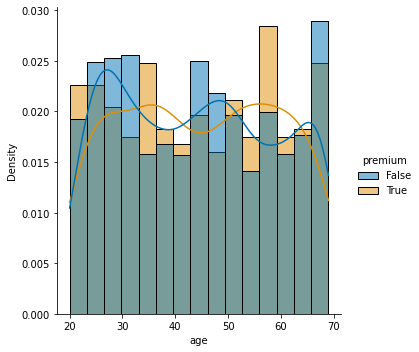

In [44]:
sns.displot(data = df, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False,palette='colorblind')


### Постройте график распределения числа успешных операций

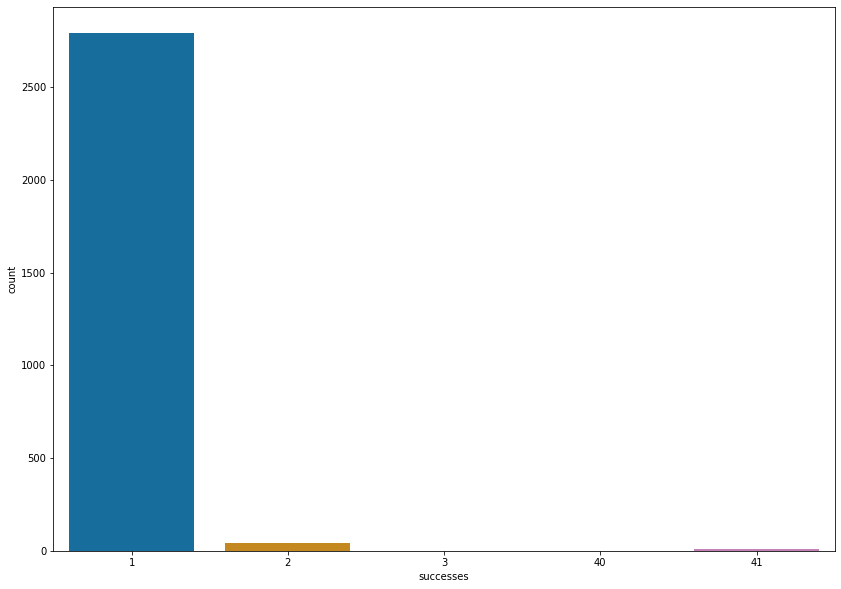

In [49]:
plt.figure(figsize=(14, 10))
sns.countplot(x=logs.query('success == True').client.value_counts().rename('successes'),palette='colorblind')

### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?

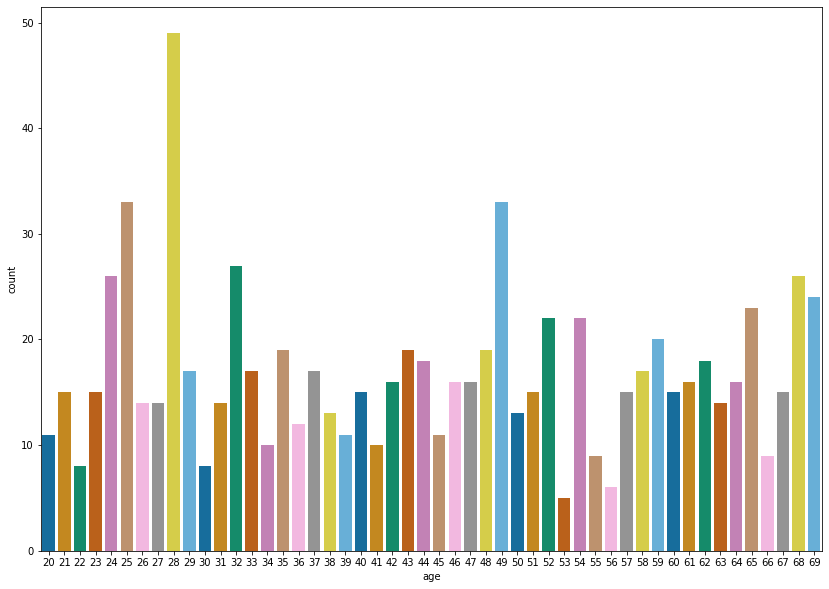

In [48]:
plt.figure(figsize=(14,10))
sns.countplot(data = df.query('platform == "computer" and success == True'), x='age',palette='colorblind')

Наибольшее количество успешных операций совершили клиенты 28 лет.